In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [2]:
alg_label = ["Original",
             "Lqdags"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [3]:
# box plots for each query
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]

datasets = []
file = "results-time.csv"
print(file)

original = pd.read_csv(f'../../original/{file}',delimiter=';')
original = original.head(4)



lqdags = pd.read_csv(f'../../lqdags/{file}',delimiter=';')


datasets = [original,
               lqdags]

#   print(i)
for j,query in enumerate(queries_label):
    data[j] = [original[query],
                     lqdags[query]] 

results-time.csv


In [6]:
datasets[0]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.214543,1.01552,0.000836,0.009468,0.367637,0.001651,0.086023,0.138891,0.022957,0.000349,0.007648,5.24194,0.000835,0.187766,25.9719,0.000468,0.001174
1,10,0.324413,1.87247,0.005263,0.035543,0.753844,0.004514,0.304694,0.214679,0.080975,0.000912,0.022759,37.77620,0.002650,0.273302,45.2481,0.001271,0.003950
2,100,0.420065,2.27653,0.006836,0.043354,1.303920,0.006093,0.309771,0.221164,0.081023,0.004233,0.033770,40.88580,0.006411,0.582844,49.2245,0.001407,0.004063
3,1000,0.449809,2.81735,0.008813,0.045813,1.335960,0.006097,0.313754,0.221174,0.081178,0.005664,0.074184,41.66760,0.014756,1.443650,63.0263,0.001442,0.004599


In [5]:
datasets[0]['k']

0       1
1      10
2     100
3    1000
Name: k, dtype: int64

In [6]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red', 'dodgerblue']#, 'darkturquoise', 'mediumspringgreen', 'lime']


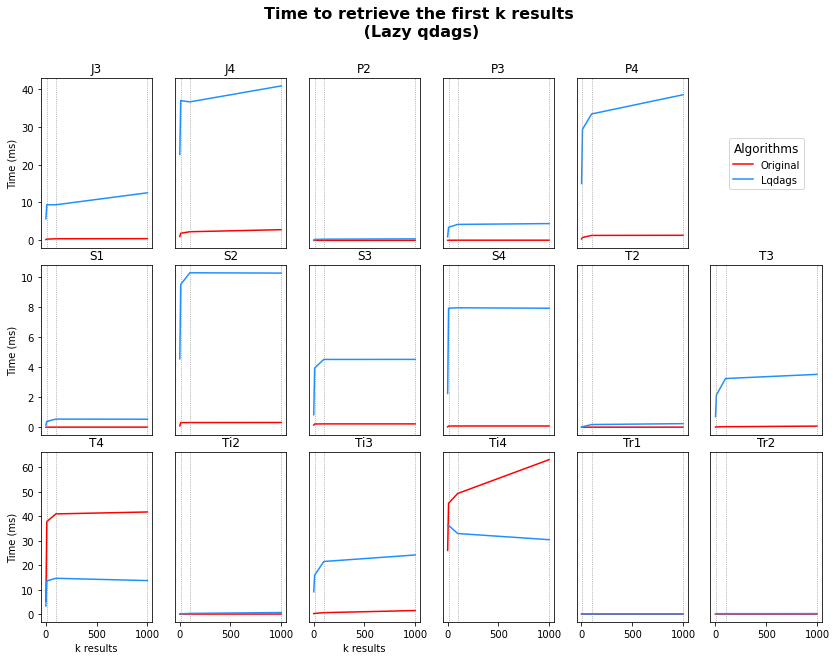

In [7]:
# Crear la figura
fig = plt.figure(figsize=(14,10))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.1, wspace=0.2)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1],sharey=j3)
p2 = fig.add_subplot(gs[0, 2],sharey=j3)
p3 = fig.add_subplot(gs[0, 3],sharey=j3)
p4 = fig.add_subplot(gs[0, 4], sharey=j3)
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1],sharey=s1)
s3 = fig.add_subplot(gs[1, 2],sharey=s1)
s4 = fig.add_subplot(gs[1, 3],sharey=s1)
t2 = fig.add_subplot(gs[1, 4],sharey=s1)
t3 = fig.add_subplot(gs[1, 5], sharey=s1)

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1],sharey=t4)
ti3 = fig.add_subplot(gs[2, 2],sharey=t4)
ti4 = fig.add_subplot(gs[2, 3], sharey=t4)
tr1 = fig.add_subplot(gs[2, 4],sharey=t4)
tr2 = fig.add_subplot(gs[2, 5],sharey=t4)

j3.set_ylabel('Time (ms)')
s1.set_ylabel('Time (ms)')
t4.set_ylabel('Time (ms)')

t4.set_xlabel('k results')
ti3.set_xlabel('k results')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    #query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
    if(query != j3 and query != s1 and query != t4):
        query.axes.get_yaxis().set_visible(False)
    if(query != t4 and query != ti2 and query != ti3 and query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=16, fontweight='bold')


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-time.pdf')

plt.show()
 

In [37]:
## SECOND SCENARIO --> V1000

In [7]:

alg_label = ["Original",
            "Lqdags"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [12]:
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[]

file = "results-v1000-time.csv"
#print(file)

original = pd.read_csv(f'../../query1000results/original/results-v1000-time-vlqd.csv',delimiter=';')
original = original.head(4)
# Drop columns where all values are zero
original = original.loc[:, (original != 0).any(axis=0)]

lqdags = pd.read_csv(f'../../query1000results/lqdags/{file}',delimiter=';')
# Drop columns where all values are zero
lqdags = lqdags.loc[:, (lqdags != 0).any(axis=0)]


datasets_v1000 = [original,
                     lqdags]

#   print(i)
for j,query in enumerate(queries_label_v1000):
    data_v1000[j] = [original[query],
                     lqdags[query]]
        

In [13]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red', 'dodgerblue']#, 'darkturquoise', 'mediumspringgreen', 'lime']


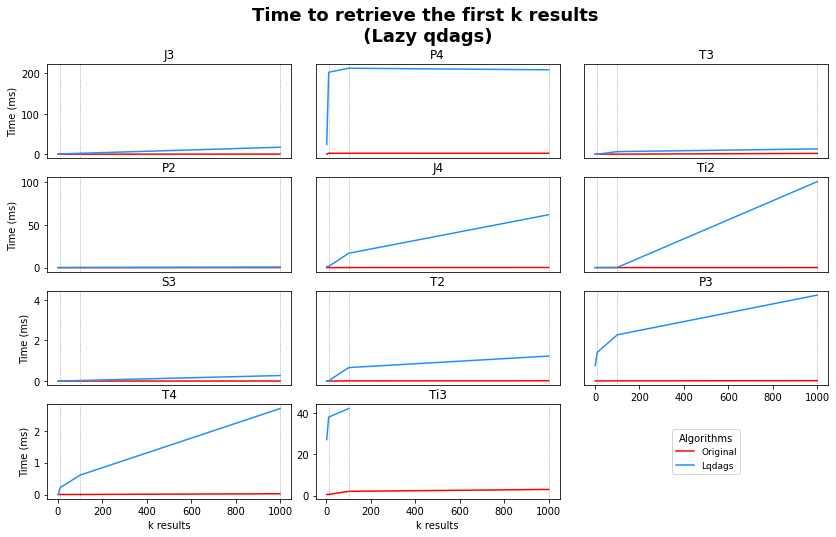

In [14]:
# GRAPH
# Crear la figura
fig = plt.figure(figsize=(14, 8))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.2, wspace=0.1)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
p4 = fig.add_subplot(gs[0, 1],sharey=j3)
t3 = fig.add_subplot(gs[0, 2],sharey=j3)

p2 = fig.add_subplot(gs[1, 0])
j4 = fig.add_subplot(gs[1, 1],sharey=p2)
ti2 = fig.add_subplot(gs[1, 2],sharey=p2)

s3 = fig.add_subplot(gs[2, 0])
t2 = fig.add_subplot(gs[2, 1],sharey=s3)
p3 = fig.add_subplot(gs[2, 2],sharey=s3)

t4 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (ms)')
p2.set_ylabel('Time (ms)')
s3.set_ylabel('Time (ms)')
t4.set_ylabel('Time (ms)')

t4.set_xlabel('k results')
ti3.set_xlabel('k results')
# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): #([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0]['k'], data_v1000[i][j], marker='', color=colors[j], label=alg_label[j])
    #query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)
    if(query != j3 and query != p2 and query != s3 and query != ti3 and query != t4):
        query.axes.get_yaxis().set_visible(False)
    if(query != t4 and query != ti3 and query != p3):
        query.axes.get_xaxis().set_visible(False)
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=9,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the first k results\n (Lazy qdags)', fontsize=18, fontweight='bold')


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/lqdags_variablek-v1000-time.pdf')

plt.show()
 